In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels[:10]  

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

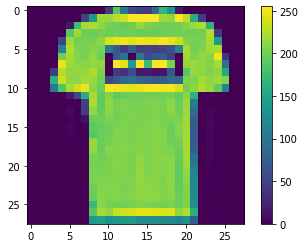

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

3


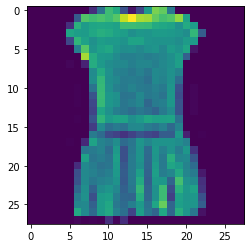

In [ ]:
plt.imshow(train_images[3])
print(train_labels[3])
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
#Parameter
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [ ]:
#HyperParameter
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6261 - accuracy: 0.7854
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3767 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3325 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3141 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2953 - accuracy: 0.8888
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2791 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2700 - accuracy: 0.8992
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2551 - accuracy: 0.9063
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2421 - accuracy: 0.9101
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3165 - accuracy: 0.8875
Test accuracy: 0.887499988079071


In [ ]:
predictions = model.predict(test_images)
predictions[0]

array([1.8110102e-05, 2.6438403e-08, 2.4454010e-07, 2.8207539e-08,
       5.3574797e-07, 3.9919186e-03, 1.3596229e-05, 1.5453010e-02,
       8.0935740e-07, 9.8052168e-01], dtype=float32)

Pick a number: 45


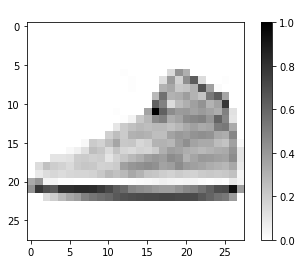

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
